### Analyse der Sonnenfleckenaktivität durch Zeit-Frequenz-Analyse

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from pandas.plotting import autocorrelation_plot
from pandas import Series
import scipy.signal as sp
from scipy.signal import chirp
import numpy as np
#from spectrum import *
%matplotlib inline
from stockwell import st

Die Aktivität der Sonnenflecken besitzt Einflüsse auf das Erdmagnetfeld, das Weltraumwetter, welches für den Betrieb von Satelliten wichtig ist und auch für den Betrieb elektrischer Einrichtungen und von Telekommunikationsanlagen auf der Erde.
In früheren Zeiten konnte auch ein Einfluss auf das Erdklima beobachtet werden, in der jüngeren Vergangenheit dominiert hier jedoch der vom Menschen verursachte Klimawandel. 

Die Anzahl der Sonnenflecken pro Jahr wird seit 1749 gezählt und steht inzwischen auch zum Download bereit:
https://www.sidc.be/SILSO/datafiles

In [2]:
#testdata = pd.read_csv("SN_y_tot_V2.0.csv",delimiter ="; ", engine = 'python') # Jährliche Zählung
testdata = pd.read_csv("SN_m_tot_V2.0.csv",delimiter =";", engine = 'python') # Monatliche Zählung
testdata.head()

,Year,Month,YearMonth,Sunspots,C5,C6,C7
0,1749,1,1749.042,96.7,-1.0,-1,1
1,1749,2,1749.123,104.3,-1.0,-1,1
2,1749,3,1749.204,116.7,-1.0,-1,1
3,1749,4,1749.288,92.8,-1.0,-1,1
4,1749,5,1749.371,141.7,-1.0,-1,1


In [3]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297 entries, 0 to 3296
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       3297 non-null   int64  
 1   Month      3297 non-null   int64  
 2   YearMonth  3297 non-null   float64
 3   Sunspots   3297 non-null   float64
 4   C5         3297 non-null   float64
 5   C6         3297 non-null   int64  
 6   C7         3297 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 180.4 KB


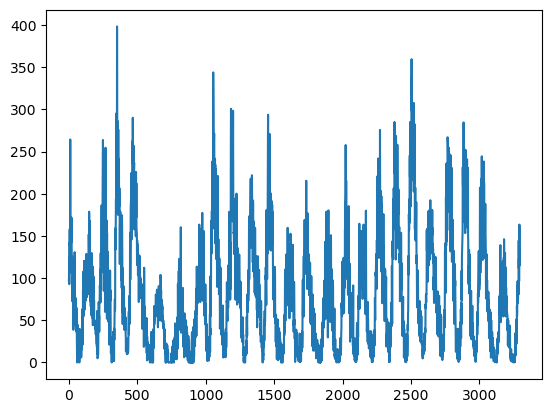

In [4]:
#testdata.plot(y='Sunspots')
plt.figure()
plt.plot(testdata.Sunspots)

Parametrierung der Stockwell Transformation: Zeit- und Frequenzachse

Für die Analyse der Dynamik ist der Mittelwert der Zeitreihe hinderlich und wird entfernt:

In [5]:
testdata['Sunspots_AC'] = testdata.Sunspots - testdata.Sunspots.mean()

##### timeseries = testdata.Sunspots_AC
fmin = 0 # 1/ Monate
fmax = 0.5 # 1/ 12 Monate 
t = testdata.YearMonth
df = 1./(t[len(t)-1]-t[0]) # Frequenzauflösung =  1/(Zeitumfang der Zeitreihe)
fmin_samples = int(fmin/df)
fmax_samples = int(fmax/df)

In [86]:
print("Frequenzauflösung in a/Jahre:",df)
print(fmax_samples)

Frequenzauflösung in a/Jahre: 0.0036408253022795207
274


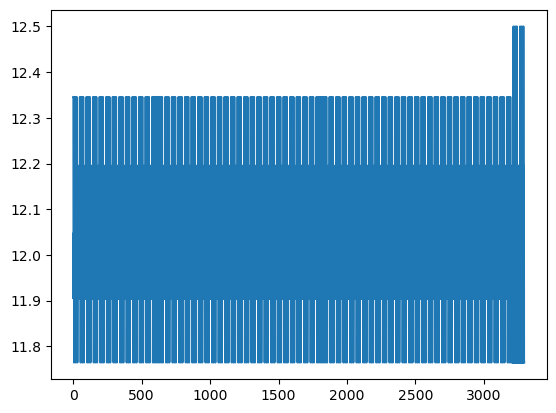

In [87]:
# Testen der Gleichmäßigkeit der Abtastung
tlist = t.array 
ts = tlist[1:-1] - tlist[0:-2]
plt.plot(1/ts)

In [88]:
# t = np.linspace(0, 10, 5001)
# w = chirp(t, f0=12.5, f1=2.5, t1=10, method='linear')
# fmin = 0  # Hz
# fmax = 25  # Hz
# fs = 1./(t[1] - t[0])
# df = 1./(t[-1]-t[0])  # sampling step in frequency domain (Hz)
# fmin_samples = int(fmin/df)
# fmax_samples = int(fmax/df)
# timeseries = w

Ausführen der Transformation

In [89]:
stock = st.st(timeseries, fmin_samples, fmax_samples)

In [90]:
stock.shape

(275, 3297)

Plot 

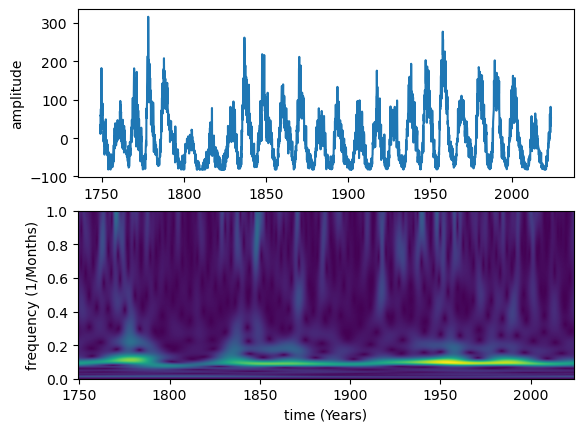

In [91]:
extent = (t[0], t[len(t)-1], fmin, fmax)

fig, ax = plt.subplots(2, 1)
ax[0].plot(t, timeseries)
ax[0].set(ylabel='amplitude')
ax[1].imshow(np.abs(stock), origin='lower', extent=extent)
#ax[1].pcolormesh(np.abs(stock) , shading='gouraud')
ax[1].axis('tight')
ax[1].set(xlabel='time (Years)', ylabel='frequency (1/Months)')
plt.show()

In [92]:
ff, tt, spectrogramm = sp.spectrogram(timeseries, nperseg = 256, noverlap = 64, fs = 12)

In [93]:
spectrogramm.shape

(129, 16)

In [94]:
ff

array([0.      , 0.046875, 0.09375 , 0.140625, 0.1875  , 0.234375,
       0.28125 , 0.328125, 0.375   , 0.421875, 0.46875 , 0.515625,
       0.5625  , 0.609375, 0.65625 , 0.703125, 0.75    , 0.796875,
       0.84375 , 0.890625, 0.9375  , 0.984375, 1.03125 , 1.078125,
       1.125   , 1.171875, 1.21875 , 1.265625, 1.3125  , 1.359375,
       1.40625 , 1.453125, 1.5     , 1.546875, 1.59375 , 1.640625,
       1.6875  , 1.734375, 1.78125 , 1.828125, 1.875   , 1.921875,
       1.96875 , 2.015625, 2.0625  , 2.109375, 2.15625 , 2.203125,
       2.25    , 2.296875, 2.34375 , 2.390625, 2.4375  , 2.484375,
       2.53125 , 2.578125, 2.625   , 2.671875, 2.71875 , 2.765625,
       2.8125  , 2.859375, 2.90625 , 2.953125, 3.      , 3.046875,
       3.09375 , 3.140625, 3.1875  , 3.234375, 3.28125 , 3.328125,
       3.375   , 3.421875, 3.46875 , 3.515625, 3.5625  , 3.609375,
       3.65625 , 3.703125, 3.75    , 3.796875, 3.84375 , 3.890625,
       3.9375  , 3.984375, 4.03125 , 4.078125, 4.125   , 4.171

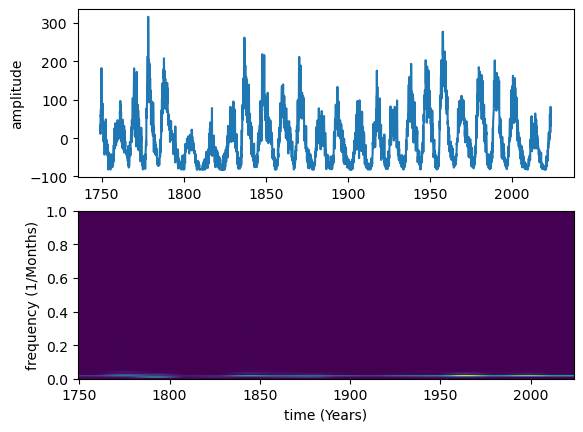

In [95]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(t, timeseries)
ax[0].set(ylabel='amplitude')
ax[1].imshow(np.abs(spectrogramm), origin='lower', extent=extent)
#ax[1].pcolormesh(np.abs(spectrogram) , shading='gouraud')
ax[1].set(xlabel='time (Years)', ylabel='frequency (1/Months)')
#ax[1].set_ylim([fmin, fmax])
#ax[1].set_xlim([t[0], t[len(t)-1]])
ax[1].axis('tight')
plt.show()

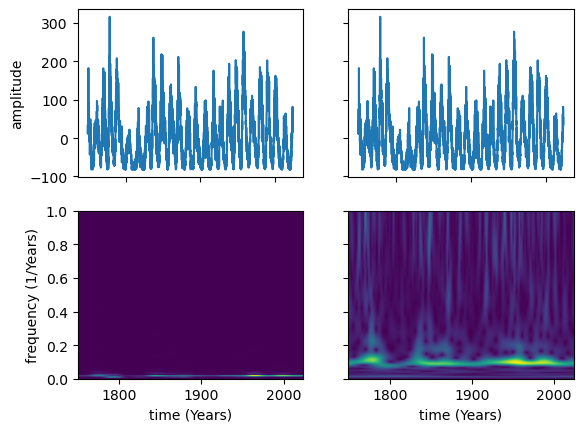

In [96]:
fig, ax = plt.subplots(2, 2)
# Plot Spectrogram
ax[0,0].plot(t, timeseries)
ax[0,0].set(ylabel='amplitude')
ax[1,0].imshow(np.abs(spectrogramm), origin='lower', extent=extent)
ax[1,0].set(xlabel='time (Years)', ylabel='frequency (1/Years)')
ax[1,0].axis('tight')
# Plot Stockwell 
ax[0,1].plot(t, timeseries)
ax[0,1].set(ylabel='amplitude')
ax[1,1].imshow(np.abs(stock), origin='lower', extent=extent)
ax[1,1].axis('tight')
ax[1,1].set(xlabel='time (Years)', ylabel='frequency (1/Years)')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for axs in ax.flat:
    axs.label_outer()
plt.show()

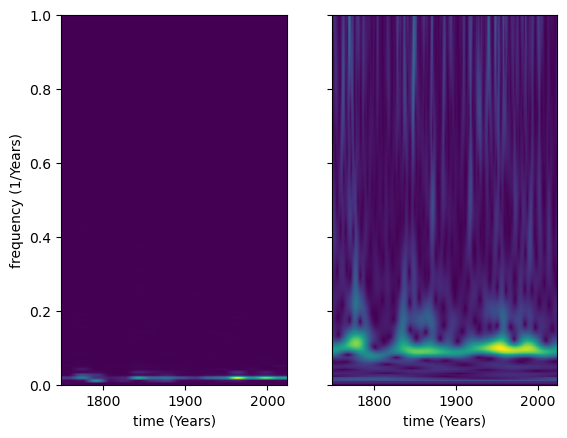

In [97]:
fig, ax = plt.subplots(1, 2)
# Plot Spectrogram
ax[0].imshow(np.abs(spectrogramm), origin='lower', extent=extent)
ax[0].set(xlabel='time (Years)', ylabel='frequency (1/Years)')
ax[0].axis('tight')
# Plot Stockwell 
ax[1].imshow(np.abs(stock), origin='lower', extent=extent)
ax[1].axis('tight')
ax[1].set(xlabel='time (Years)', ylabel='frequency (1/Years)')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for axs in ax.flat:
    axs.label_outer()
plt.show()

In [59]:
testdata.head()

,Year,Month,YearMonth,Sunspots,C5,C6,C7,Sunspots_AC
0,1749,1,1749.042,96.7,-1.0,-1,1,14.948772
1,1749,2,1749.123,104.3,-1.0,-1,1,22.548772
2,1749,3,1749.204,116.7,-1.0,-1,1,34.948772
3,1749,4,1749.288,92.8,-1.0,-1,1,11.048772
4,1749,5,1749.371,141.7,-1.0,-1,1,59.948772


<Axes: xlabel='Year'>

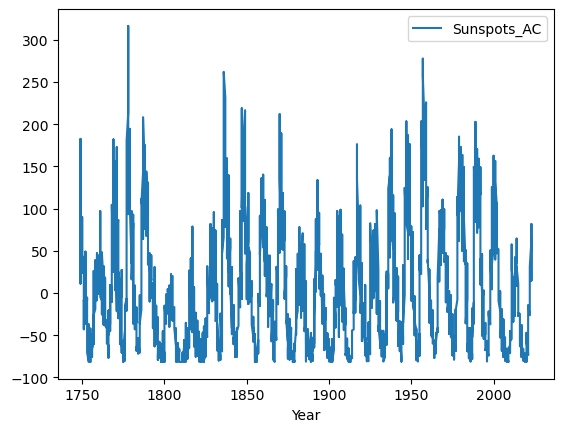

In [60]:
testdata.plot(x='Year',y='Sunspots_AC')

Ein autoregressives Modell nach Yule-Walker kann mit vorhandenen Funktionen, bspw aus dem Paket spectrum berechnet werden.

In [35]:
#AR, P, k = aryule(testdata.Sunspots_AC, 2)

Alternativ kann 

$u(k) = b_1 u(k-1) + b_2 u(k-2) + v(k) $

In [36]:
# Aufbau der Regressionsmatrix und des Vektors für die rechte Seite
phi = np.zeros((len(testdata.Sunspots_AC),2))
u = np.zeros((len(testdata.Sunspots_AC),1))
 
for i in range(2,len(testdata.Sunspots_AC)): # Aufstellen des Gleichungssystemes: p[0]= a,p[1]= b
    phi[i,0] = testdata.Sunspots_AC[i-1]
    phi[i,1] = testdata.Sunspots_AC[i-2]
    u[i,0] = testdata.Sunspots_AC[i]
  
AR, residuals, rank, s = np.linalg.lstsq(phi,u,-1)

AR = -AR

Transformation in den Frequenzbereich: Berechnung des Leistungsdichtespektrums. Es ergibt sich eine Darstellung mit einer Frequenz in der Einheit [1/Jahre] Entsprechend kann die Periodizität im Diagramm einfach abgelesen werden

In [37]:
#PSD = arma2psd(A=AR, rho=residuals)
#PSD = PSD[4096:2048:-1]
#plt.figure()
#plt.plot(linspace(0, 0.5 , len(PSD)), PSD, label='Yule-Walker Estimation')
#plt.xlabel('Normalized frequency [1/Year]')
#plt.ylabel('One-sided PSD')
#plt.legend()
#plt.savefig('YWestimation.svg')
#plt.grid()

Die Periodendauer kann aber auch direkt aus den Parametern bestimmt werden. Hierzu wird die Nullstelle des charakteristischen Polynoms berechnet.

In [38]:
AR

array([[-0.66706272],
       [-0.27352133]])

In [39]:
ARpoly = np.append(1, AR)
print(ARpoly)

[ 1.         -0.66706272 -0.27352133]


In [40]:
p = np.roots(ARpoly)
print(p)

[ 0.95382524 -0.28676252]


In [41]:
f = 1/(2*np.pi) * np.arctan(np.imag(p[0])/np.real(p[0]))

In [42]:
print(1/f)

inf


C:\Users\dirkm\AppData\Local\Temp\ipykernel_1852\2039749321.py:1: RuntimeWarning: divide by zero encountered in scalar divide
  print(1/f)
